## LINEAR REGRESSION

### Use Case 

* 1000 companies
  - based on - expenditure 
  - predict  - profit


* Predicting profit of 1000 companies based on the attributes mentioned in the figure:



<img src="predict_profit.png" width="800" height="400">


#### 1. Importing the Libraries

In [13]:
# importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

#### 2. Load the Dataset - Extrect Independent Dependent Variable


In [14]:
# import and exract the data 
companies = pd.read_csv ('/home/cgr/Documents/ML_Algorithms_Explained_Simplilearn/1000_Companies.csv')

x = companies.iloc [:, :-1].values  # x axes is independent variables r&d spend, admin, marketing, state 
# print(x)

y = companies.iloc [:, 4].values    # y axes is dependent variable profit 
# print(y) 

companies.head()
# companies.shape

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### 3. Data Visualization - Building the Correlation Matrix

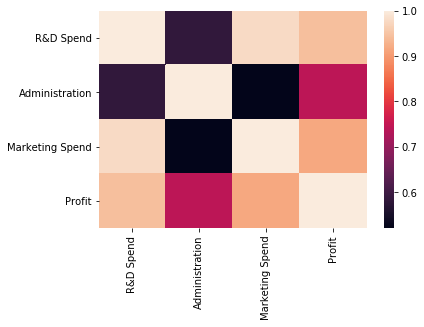

In [15]:
# visualization - building the corr
sns.heatmap(companies.corr())

#### 4. Encoding Categorical Data

In [16]:
# encoding categorical data = like newyork:0 california:1 florida:2
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
print(x)
x.shape

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 ...
 [100275.47 241926.31 227142.82 0]
 [128456.23 321652.14 281692.32 0]
 [161181.72 270939.86 295442.17 2]]


(1000, 4)

In [17]:
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')
# x = enc.fit_transform(x).toarray()
# x

#### 5. Avoiding Dummy Variable Trap

In [18]:
x = x[:, 1:]

#### 6. Splitting Dataset İnto Train and Test 

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0)

#### 7. Fitting Multiple Linear Regression to Train Set

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 8. Predicting the Test Set Results

In [21]:
y_pred = regressor.predict(x_test)
print(y_pred[:20])

print("---------------")

print(y_test[:20])

[ 90209.64901318  88876.28325862  95200.74973042 174739.58503941
  84013.74722284 110572.81423949 169438.58451208  91855.1682484
 163402.29005648  54991.76617392  67874.72481309 150180.9861358
 126512.60670878  60430.86889281 175991.46628657  76097.46542299
 118577.95366564 163338.33779446 165329.70854714 180487.66382609]
---------------
[ 89012.02672  87654.55773  94093.35179 175396.2616   83356.61784
 110395.794   105008.31     90687.2921  164180.2702   53483.75718
  66273.3533  150393.716   125971.2343   58694.93455 176344.525
  75297.23305 118219.3944  163462.6654  132602.65    181574.4968 ]


#### 9. Calculating the Coefficent and İntercept

In [22]:
print(regressor.coef_)

[   1.04239904    0.35510511 -320.45531609]


In [23]:
print(regressor.intercept_)

-88623.76527343772


#### 10.Evaluating the Model

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.8985038788872521